In [15]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

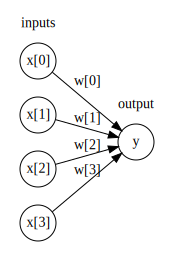

In [3]:
# 선형 회귀 모델 예시

display(mglearn.plots.plot_logistic_regression_graph())

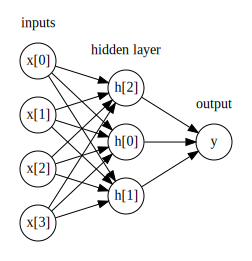

In [4]:
# MLP 예시

display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

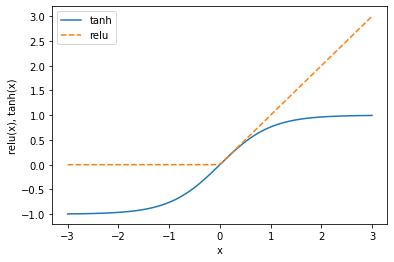

In [6]:
# ReLU, tanh 예시

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

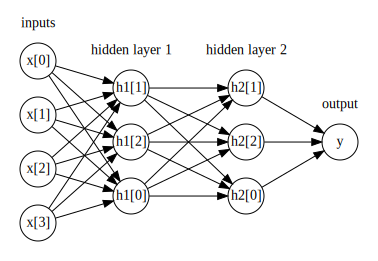

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

- MLP에서 정해야 하는 중요한 매개변수는 은닉층의 유닛 개수

Text(0, 0.5, '특성 1')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


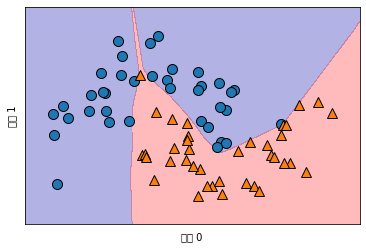

In [9]:
# 신경망 튜닝

# 은닉 유닛이 100개인 신경망의 결정 경계
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=42).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


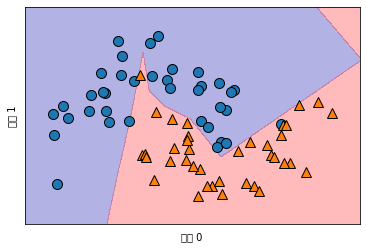

In [10]:
# 은닉 유닛 10개인 신경망의 결정 경계

mlp = MLPClassifier(solver='lbfgs', random_state=42, hidden_layer_sizes=[10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- MLP는 기본값으로 은닉 유닛 100개를 사용
- 이런 작은 데이터셋에는 과분한 크기기 때문에 은닉 유닛의 개수를 10개로 줄여도 여전히 좋은 결과를 얻을 수 있다.
- 은닉 유닛 개수의 감소로 모델의 복잡도는 낮아졌지만 결정 경계가 조금 더 날카로워진 것을 볼 수 있다.
- 은닉 유닛, 은닉층의 개수를 추가하거나 tanh함수를 통해 결정 경계를 더 매끄럽게 할 수 있다.

c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


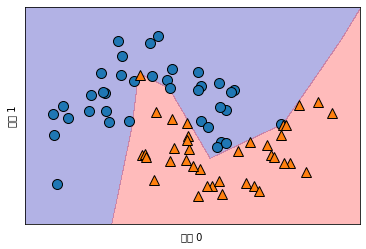

In [11]:
# 10개의 유닛으로 된 두 개의 은닉층과 렐루 활성화 함수로 만든 결정 경계

mlp =  MLPClassifier(solver='lbfgs', random_state=42, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


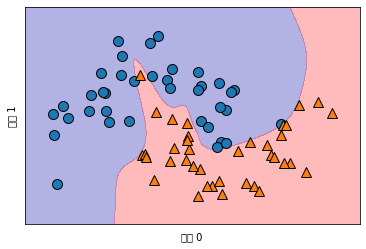

In [12]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=42, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')


c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


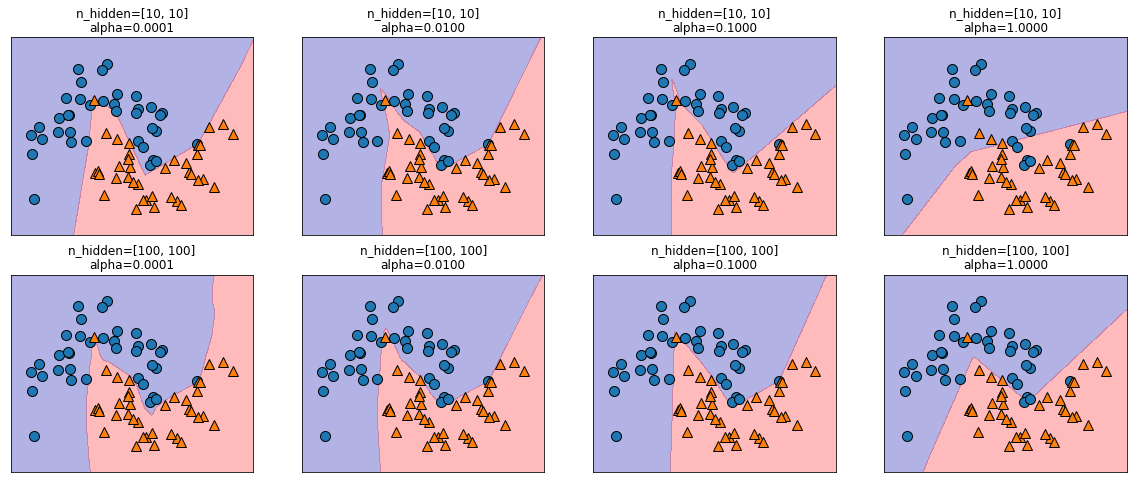

In [13]:
# 은닉 유닛과 alpha 매개변수에 따라 변하는 결정 경계

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=42, max_iter=1000,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))



- 리지 회귀와 선형 모델에서처럼 L2 페널티를 활용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도 제어 가능
- 위의 역할을 하는 매개변수는 alpha이고 기본값은 매우 낮게(거의 규제하지 않게) 설정 되어있다.

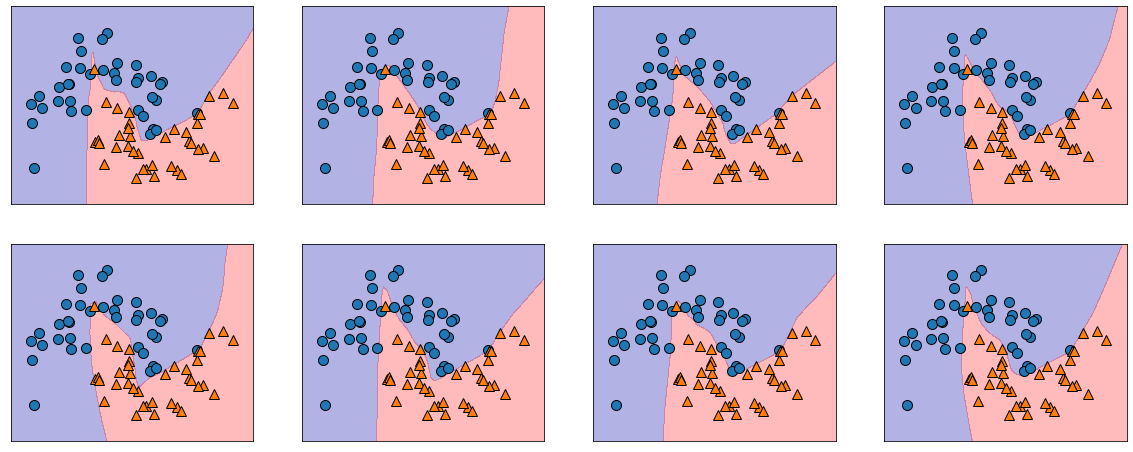

In [14]:
# 무작위로 다른 초깃값을 주되 같은 매개변수로 학습한 결정 경계

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [16]:
cancer = load_breast_cancer()

print("유방암 데이터의 특성별 최댓값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.93


In [20]:
# SVC에서와 같이 데이터의 스케일 변경

# 훈련 세트 각 특성의 평균을 계산
mean_on_train = X_train.mean(axis=0)

# 훈련 세트 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면 평균 0, 표준 편차 1인 데이터로 변환
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 같은 변환을 테스트 세트에도 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.99


c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 스케일 조정을 통해 다른 모델 못지않은 결과를 얻을 수 있었다.
- 하지만 최대 반복 횟수에 도달했다는 오류가 출력되었는데 이것은 adam 알고리즘에 관한 것으로
- 이 경고가 출력될 경우 최대 반복 횟수를 늘려야 한다.

In [21]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.97


In [22]:
mlp = MLPClassifier(max_iter=1000, random_state=42, alpha=1)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.99


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45787 (\N{HANGUL SYLLABLE NIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\minicon

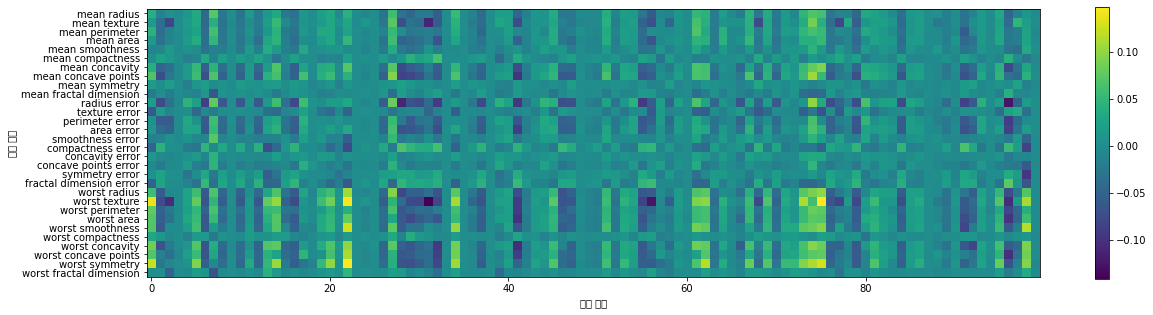

In [23]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()

- 위의 히트맵을 통해 은닉층 사이의 학습된 가중치를 확인할 수 있다.
- 밝은 색은 큰 양수 값을, 어두운 색은 음수 값을 나타낸다.
- 모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론할 수 있다. ex)smootheness error
- sklearn의 MLP 모델은 전체 신경망 종류의 일부만 만들 수 있기 때문에 전문적인 딥러닝 라이브러리가 필요하다.
- 또한 전문 딥러닝 라이브러리에서는 GPU가 사용가능하다.

#### 장단점과 매개변수

- 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다.
- 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 머신러닝 알고리즘을 넘는 성능을 보일 때가 있다.
  #
- 하지만 학습이 오래걸리고 데이터 전처리에 주의해야 한다.
- SVM과 비슷하게 모든 특성이 같은 의미를 가진 동질 데이터에서 잘 작동한다.
- 다른 종류의 특성을 가진 데이터라면 트리 기반 모델이 더 잘 작동할 수 있다.

  #
- 신경망에서 가장 중요한 매개변수는 은닉층의 개수와 각 은닉층의 유닛 수이다.
- 처음엔 한 두개의 은닉층으로 시작하며 각 은닉층의 유닛 수는 보통 입력 특성 수와 비슷하게 설정하지면 수천 초중반을 넘진 않는다.
- 일반적으로 매개변수 조정시 충분히 과대적합 시켜서 훈련 데이터를 충분하게 학습시키고
- 신경망 구조를 줄이거나 alpha값 조정을 통해 일반화 성능을 향상시킨다.
##### 가중치 수 계산 예시
- 특성 100개와 은닉 유닛 100개를 가진 이진 분류의 경우
- 100 * 100 + 100 = 10100개의 가중치와 은닉층, 출력층 사이의 100*1 + 1 = 101개의 가중치로 총 10201개이다.


#### solver 매개변수
- solver 매개변수를 사용해 모델을 학습시키는 방법 또는 매개변수 학습에 사용하는 알고리즘 지정 가능
- 첫 번째는 'adam' 으로 일반적으로 잘 작동하지만 데이터 스케일에 민감하여 평균 0, 분산 1로 조정하는 것이 중요
- 두 번째는 'lbfgs' 로 안정적이지만 규모가 큰 모델에서는 오래걸린다.
- 마지막은 'sgd' 다른 매개변수와 튜닝하여 최선의 결과를 만들 수 있다.

  #
- sklearn 에서의 fit 메서드는 모델을 초기화한 후 데이터를 학습한다. 추가 학습하는 것이 아니다.